In [5]:
from qiskit import generate_preset_pass_manager, QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit_ibm_runtime import EstimatorV2 as Estiamtor, QiskitRuntimeService, SamplerV2 as Sampler

In [6]:
service = QiskitRuntimeService()
backend = service.backend('ibm_rensselaer')

#### Defining a Bell State
A bell state is the most basic state that two entangled qubits can be in and they are the definitive proof that quantum entanglement and superposition exist. The results of a `Bell` state would show two qubits being maximally correlated to two potential states.

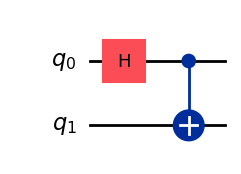

In [11]:
circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0, 1)
circ.draw(output='mpl')

#### The Drawn Diagram
This diagram shows $q_0$ being place in a superposition by the `Hadamard` gate. It is then placed into entanglement with $q_1$ by the `CNOT` gate.
The exact mathematics that follow are 
$$|00\rangle \overbrace{\implies}^{Hadamard} \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)|0\rangle$$
$$\text{State} = \frac{1}{\sqrt{2}}(|00\rangle + |01\rangle)$$
$$\text{CNOT} = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$$
which is the resulting state after the 

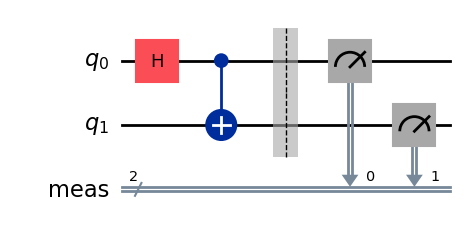

In [12]:
circ.measure_all()
circ.draw(output='mpl')

#### Mapping the Circuit
Hadamard and CNOT gates are not "physically" supported by the quantum computer, so they need to be converted to physical gate operations. This is done through a process called "transpilation", which is what the below code does.

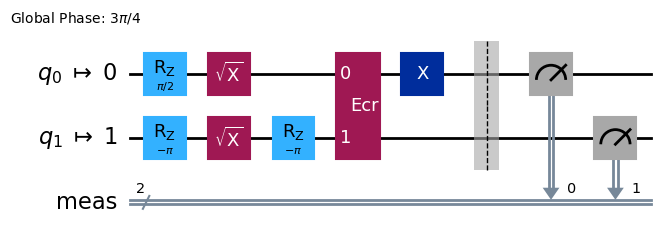

In [32]:
pm = generate_preset_pass_manager(optimization_level=1, backend=backend)
isa_circuit = pm.run(circ)
isa_circuit.draw(output='mpl', idle_wires=False)

Notice how they look so different, since a lot more physical gates are needed to represent those gates.

#### Sending the Job to the Quantum System One
This job will be done on the `Sampler` primitive, since the finished state would be measured and "sampled".

In [17]:
sampler = Sampler(mode=backend)

In [19]:
job = sampler.run([isa_circuit])

In [21]:
job_id = job.job_id()
job_id

'cwqcavv60bqg008p4v0g'

In [22]:
result = job.result()

In [29]:
data = result[0].data.meas.get_counts()

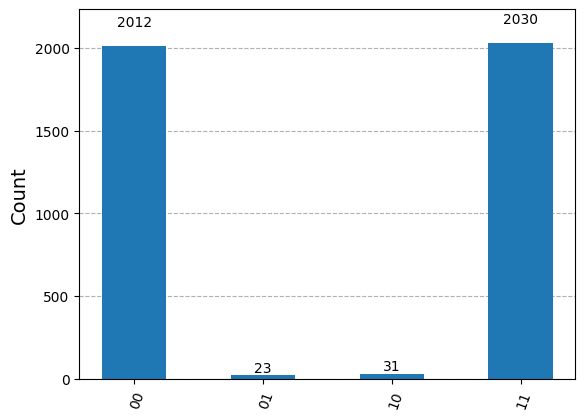

In [30]:
from qiskit.visualization import plot_histogram

plot_histogram(data=data)

#### Interpreting the Results
The results show a strong correlation to the $|00\rangle$ and the $|11\rangle$ states, which matches with the analytical result of $\frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$. Normally, it would be a perfect 50/50 correlation to the two states, but there is unforunately noise in the system, which manifests as the counts in the $|01\rangle$ and the $|10\rangle$ states.